In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('US_Heart_Patients.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
df['glucose'].fillna(method='ffill',inplace=True)

In [9]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose              0
TenYearCHD           0
dtype: int64

In [7]:
df.fillna(method='ffill',inplace=True)

In [6]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


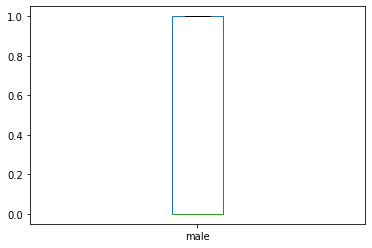

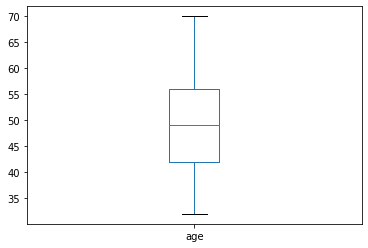

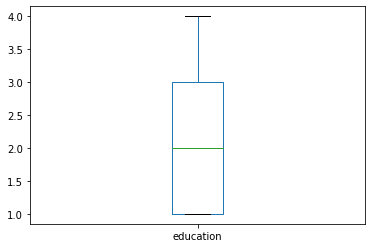

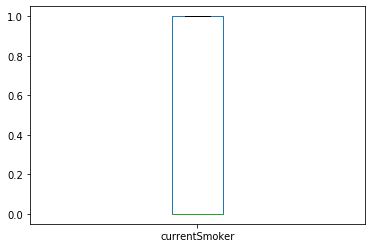

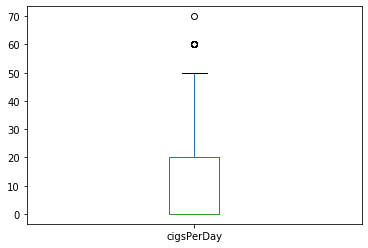

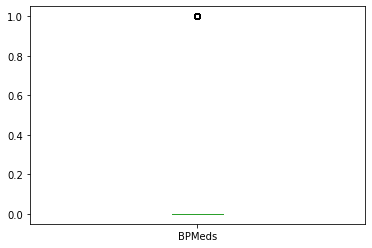

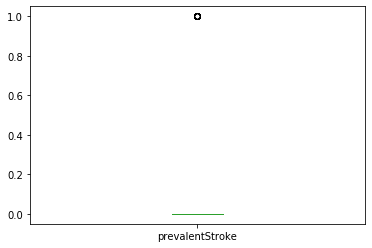

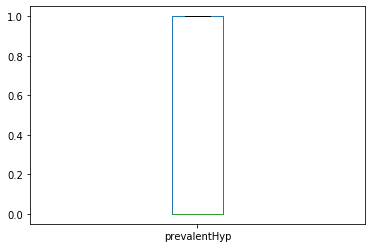

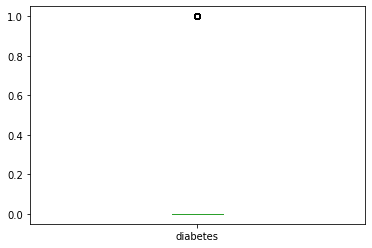

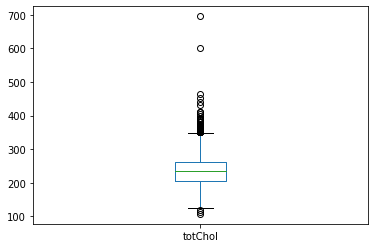

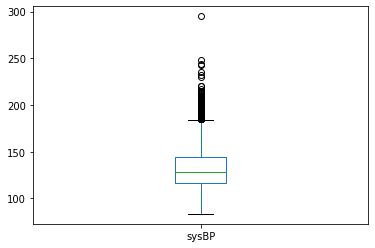

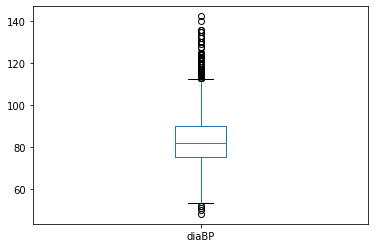

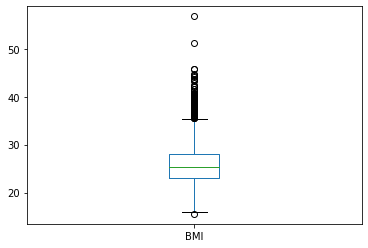

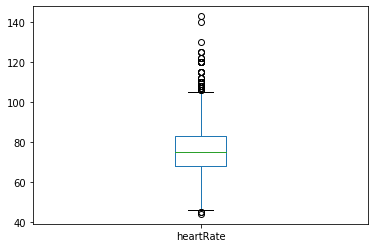

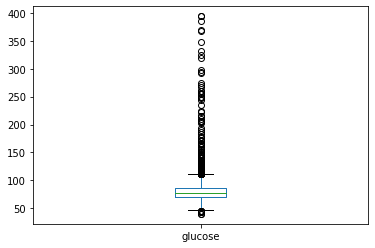

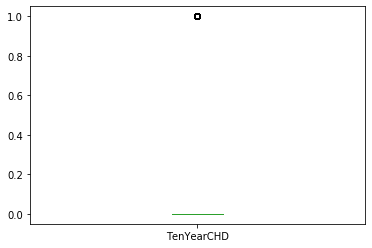

In [14]:
import matplotlib.pyplot as plt
for i in df.columns:
    df[i].plot(kind='box')
    plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [8]:
# ols model
y = df['TenYearCHD']
x = df.drop(columns='TenYearCHD')

In [9]:
x_constant = sm.add_constant(x)
modelols = sm.Logit(y,x_constant).fit()
modelols.summary()


Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7


/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Tue, 11 Feb 2020   Pseudo R-squ.:                  0.1107
Time:                        10:39:03   Log-Likelihood:                -1606.2
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.904e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9749      0.659    -12.106      0.000      -9.266      -6.684
male                0.5094      0.100      5.076      0.000       0.313       0.706
age                 0.0620      0.006      9.972      0.000       0.050       0.074
education          -0.0156      0.046     -0.343      0.731      -0.105       0.074
currentSmoker       0.0139      0.144      0.097      0.923      -0.268       0.296
cigsPerDay          0.0209      0.006      3.681      0.000       0.010       0.032
BPMeds              0.2311      0.219      1.054      0.292      -0.198       0.661
prevalentStroke     0.9706      0.441      2.199      0.028       0.106       1.836
prevalentHyp        0.2346      0.128      1.828      0.068      -0.017       0.486
diabetes            0.3055      0.281      1.086      0.278      -0.246       0.857
totChol             0.0017      0.001      1.711      0.087      -0.000       0.004
sysBP               0.0142      0.004      4.012      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.477      0.633      -0.015       0.009
BMI                 0.0019      0.012      0.162      0.872      -0.021       0.025
heartRate          -0.0014      0.004     -0.354      0.723      -0.009       0.006
glucose             0.0055      0.002      2.794      0.005       0.002       0.009
===================================================================================
"""

In [ ]:
# Based on p_values
# H0 : coefficient is zero---(the faeture is not signifcant)---coefficient will be same
# H1 : coefficient is not zero---(the faeture is significant)--coefficient is not same
# P_value < alpha -- reject H0


In [18]:
# vif test for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
vif,1.196376,1.372623,1.052969,2.495886,2.622972,1.099504,1.018958,2.05219,1.509896,1.107358,3.738438,2.967596,1.233649,1.095108,1.527749


In [19]:
# VIF table shows there is no multi - collinearity

In [10]:
# Backward elimination for feature selection
cols = list(x.columns.values)
pmax = 1
while (len(cols)>2):
    p=[]
    x1=x[cols]
    x1 = sm.add_constant(x1)
    model = sm.Logit(y,x1).fit()
    p = pd.Series(model.pvalues.values[1:],index=cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    print('hii',feature_with_p_max)
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)



Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7
hii currentSmoker
Optimization terminated successfully.
         Current function value: 0.378832
         Iterations 7
hii BMI
Optimization terminated successfully.
         Current function value: 0.378834
         Iterations 7
hii heartRate
Optimization terminated successfully.
         Current function value: 0.378849
         Iterations 7
hii education
Optimization terminated successfully.
         Current function value: 0.378864
         Iterations 7
hii diaBP
Optimization terminated successfully.
         Current function value: 0.378893
         Iterations 7
hii BPMeds
Optimization terminated successfully.
         Current function value: 0.379025
         Iterations 7
hii diabetes
Optimization terminated successfully.
         Current function value: 0.379175
         Iterations 7
hii totChol
Optimization terminated successfully.
         Current function value: 0.379513
    

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Tue, 11 Feb 2020   Pseudo R-squ.:                  0.1080
Time:                        10:39:11   Log-Likelihood:                -1611.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 3.457e-81
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4018      0.387    -21.723      0.000      -9.160      -7.644
male                0.4911      0.097      5.057      0.000       0.301       0.681
age                 0.0646      0.006     10.922      0.000       0.053       0.076
cigsPerDay          0.0211      0.004      5.513      0.000       0.014       0.029
prevalentStroke     1.0512      0.436      2.411      0.016       0.197       1.906
sysBP               0.0172      0.002      8.576      0.000       0.013       0.021
glucose             0.0068      0.002      4.370      0.000       0.004       0.010
===================================================================================
"""

In [12]:
model.params

const             -8.401794
male               0.491120
age                0.064620
cigsPerDay         0.021130
prevalentStroke    1.051193
sysBP              0.017156
glucose            0.006751
dtype: float64

In [ ]:
# Age
# coeff = 0.0646
# p_value = 0.000

# 1 . +ve sign of coeff indicates when age increases , TenYearCHD increases
# 2. When Age increases by one year, log(odds) of CHD increases by coeff(0.0646) which is slope
# 3. When Age increases by one year , odds(CHD) increases (e^coeff-1)


In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Tue, 11 Feb 2020   Pseudo R-squ.:                  0.1080
Time:                        10:39:16   Log-Likelihood:                -1611.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 3.457e-81
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4018      0.387    -21.723      0.000      -9.160      -7.644
male                0.4911      0.097      5.057      0.000       0.301       0.681
age                 0.0646      0.006     10.922      0.000       0.053       0.076
cigsPerDay          0.0211      0.004      5.513      0.000       0.014       0.029
prevalentStroke     1.0512      0.436      2.411      0.016       0.197       1.906
sysBP               0.0172      0.002      8.576      0.000       0.013       0.021
glucose             0.0068      0.002      4.370      0.000       0.004       0.010
===================================================================================
"""

In [46]:
# Male
# coeff = 0.4911
# Positvie sign of male coefficent indicates that male got more chance of chd compared to female(females is zero which is dropped . we consider it as base)
#log(odds) of CHD for male is higher than 0.49(coeff) compared to female
# odds(male)/odds(female) = e^(coeff) = np.exp(0.491120)



In [14]:
model.predict()

array([0.0451236 , 0.05518113, 0.15104832, ..., 0.11619865, 0.08159604,
       0.08121647])

In [15]:

li=[]
for j in range(0,4240):
    o=-8.4018+df['male'][j]*0.4911 + df['age'][j]*0.0646+df['cigsPerDay'][j]*0.0211 + df['prevalentStroke'][j]*1.0512 + df['sysBP'][j]*0.0172+ df['glucose'][j]*0.0068
    num = np.exp(o)
    den = num + 1
    prob = num/den
    
    
    li.append(prob)
   
print(li)

[0.04545551900206116, 0.05560874879481632, 0.15201290486562635, 0.3663749762658993, 0.10612958192021697, 0.13531030641701988, 0.20094476568084146, 0.056125656684760133, 0.17072468148510644, 0.24692131399019443, 0.08569262856698927, 0.0494536997002559, 0.14867895458390737, 0.04525202433480368, 0.04067953673361921, 0.06654589110801014, 0.14985993844804027, 0.07751497494426386, 0.03869058649773228, 0.08096553902378167, 0.06786229357699453, 0.05108637257627837, 0.15076674270384963, 0.1370276406452703, 0.18154720797805365, 0.09540986256571674, 0.10110560441045453, 0.0837157117455158, 0.2913575273696212, 0.1434900794870926, 0.06514353122595282, 0.149618035769605, 0.19591879549891963, 0.2592635081568076, 0.29311561539327896, 0.05653496547988279, 0.2417883154607805, 0.4330298484209808, 0.08136826397635863, 0.04181042236655045, 0.053211560102846694, 0.04186654559381983, 0.11985542067284342, 0.18665399508919245, 0.5067995807883484, 0.051231998252450575, 0.37196409677611986, 0.12270071663757327, 

In [72]:
df['Prob'] = li

In [61]:
df['male'][4238]

1

In [73]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Prob
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0.045456
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0.055609
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0.152013
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0.366375
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0.106130
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0,0.135310
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1,0.200945
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0,0.056126
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0,0.170725
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0,0.246921


In [74]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Prob
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0.045456
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0.055609
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0.152013
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0.366375
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0.106130
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0,0.135310
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1,0.200945
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0,0.056126
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0,0.170725
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0,0.246921


In [75]:
df.drop(columns='Prob',inplace=True)

In [16]:
df['Prob'] = model.predict()

In [17]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Prob
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0.045124
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0.055181
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0.151048
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0.364153
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0.105343
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0,0.133916
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1,0.199498
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0,0.055769
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0,0.169442
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0,0.245121


In [18]:
df1 = pd.DataFrame(columns=['TenYearCHD','Prob'],data=df)
df1

,TenYearCHD,Prob
0,0,0.045124
1,0,0.055181
2,0,0.151048
3,1,0.364153
4,0,0.105343
5,0,0.133916
6,1,0.199498
7,0,0.055769
8,0,0.169442
9,0,0.245121


In [23]:
li=[]
for i in df['Prob']:
    if(i<0.5):
        li.append(0)
    else:
        li.append(1)
li

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [24]:
# Model Evaluation
df1['Pred']  = li

In [25]:
df1

,TenYearCHD,Prob,Pred
0,0,0.045124,0
1,0,0.055181,0
2,0,0.151048,0
3,1,0.364153,0
4,0,0.105343,0
5,0,0.133916,0
6,1,0.199498,0
7,0,0.055769,0
8,0,0.169442,0
9,0,0.245121,0


In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [28]:
confusion_matrix(df1['TenYearCHD'],df1['Pred'])

array([[3571,   25],
       [ 593,   51]])

In [ ]:
# Accuracy = (0,0)+(1,1)/ Total
# Accuracy = (TN+TP)/Total
# TPR---how much correct is predicted correct
#TPR = (TP)/(TP+FN)
# FPR = FP/(TN+FP)
# For good model , TPR should be high, FPR. should be low

In [38]:
# Accuarcy 
print(accuracy_score(df1['TenYearCHD'],df1['Pred']))

print((3571 + 51)/(3571+25+51+593))


0.8542452830188679
0.8542452830188679


In [35]:
print(classification_report(df1['TenYearCHD'],df1['Pred']))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3596
           1       0.67      0.08      0.14       644

    accuracy                           0.85      4240
   macro avg       0.76      0.54      0.53      4240
weighted avg       0.83      0.85      0.80      4240



In [67]:
# ROC analysis
# Trade off between TPR and FPR

In [36]:
from sklearn.metrics import roc_auc_score,roc_curve


In [40]:
#AOC
#Area under ROC line
roc_auc_score(df1['TenYearCHD'],df1['Prob'])

0.728857417489412

In [42]:
fpr,tpr,tresh=roc_curve(df1['TenYearCHD'],df1['Prob'])

In [43]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99805339, 0.99805339,
       1.        ])

In [44]:
tpr

array([0.        , 0.0015528 , 0.00465839, ..., 0.9984472 , 1.        ,
       1.        ])

In [65]:
tresh[0] = tresh[0] - 1

In [46]:
import matplotlib.pyplot as plt

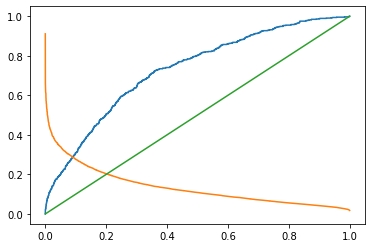

In [66]:
plt.plot(fpr,tpr)
plt.plot(fpr,tresh)
plt.plot(fpr,fpr)
plt.show()

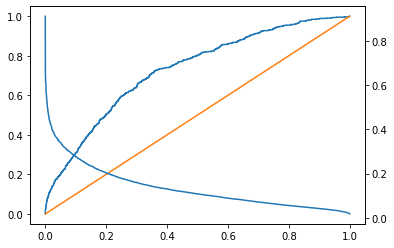

In [68]:
fig , axes = plt.subplots()
axes.plot(fpr,tpr)
axes.plot(fpr,fpr)
axes1 = axes.twinx()
axes1.plot(fpr,tresh)
plt.show()
